# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [20]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np

%matplotlib inline

### Step 2: Read in your data set 

In [21]:
#Read in data from source 
admissions = pd.read_csv("admissions.csv")
print admissions.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [22]:
admissions.count() #Shows us the number of non-null observations of each of our columns

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [23]:
admissions.shape #Shows us the size of our data frame. There are 400 rows & 4 colums. 

(400, 4)

Answer: There's 400 observations. GRE values are missing for 2 records, GPA values are missing for 2 records, and undergraduate school prestige is missing 1 record. There are no records missing for the "outcome" variable - admit.

# Before we go any further, let's create a data dictionary

Outcome/Covariate | Variable | Description | Type of Variable
--- | ---| ---| ---
outcome | admit | 0 = No, 1 = Yes | categorial/discrete
covariate | gre | GRE score for the applicant | categorial/discrete
covariate | gpa| GPA for the applicant | continuous
covariate | prestige | How prestigious the applicant's undergraduate school is. 1 is the highest and 4 is the lowest | categorical

#### Question 2. Create a summary table

In [24]:
# I decided to use the describe function to create a summary table for our data frame

admissions.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: There are a wider range of possible values for GRE score vs. GPA. GRE ranges from 220 - 800 (range of 580), whereas GPA only ranges from 2.26 - 4.0 (range of 1.74). As a result, since there are a wider range of possible values, it makes sense that the standard deviation & variance from the average would be much higher for GRE (115.6) vs. GPA (0.38).

#### Question 4. Drop data points with missing data


In [25]:
# use dropna() to actually drop the records.
# how = "any" will drop any record where at least 1 column value is null
# inplace = True allows us to automatically update the data frame, and doesn't require us to redefine the data frame

admissions.dropna(how = "any", inplace = True)

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [26]:
admissions.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

Answer: We know that the data is now correct because there are the same number of non-null records for all 4 columns - admit, gre, gpa, and prestige. This means that there are no records that have null records. 

#### Question 6. Create box plots for GRE and GPA

([<matplotlib.axis.XTick at 0x1136c3d90>],
 <a list of 1 Text xticklabel objects>)

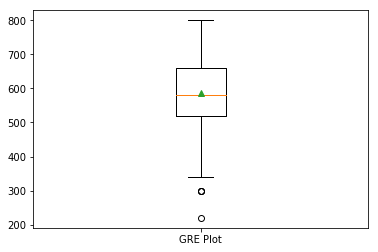

In [27]:
#boxplot 1, GRE

plt.boxplot(admissions.gre, showmeans = True) #Makes boxplot based on GRE. Triangle is the mean, which we compare to median
plt.xticks([1], ["GRE Plot"]) 

([<matplotlib.axis.XTick at 0x11378a6d0>],
 <a list of 1 Text xticklabel objects>)

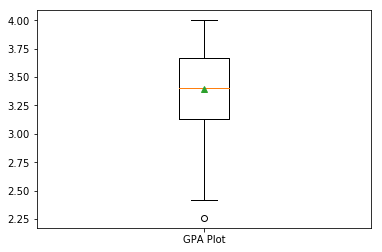

In [28]:
#boxplot 2, GPA

plt.boxplot(admissions.gpa, showmeans = True) #Makes boxplot based on GRE. Triangle is the mean, which we compare to median
plt.xticks([1], ["GPA Plot"]) #Labels x axis

#### Question 7. What do this plots show?

Answer: For both GPA & GRE, the means & medians are generally very close to each other. There also aren't many outliers in either data set (represented by the white dots), which means that most data points fall within 1.5x +/- the IQR. 

The plot for GPA looks a little "skewed" (i.e. why is the whisker to the bottom so much longer than the one to the top???), but after some more thinking, I realize that it is because the GPA score maxes out at 4.0, and the median/interquartile range is close enough to the max that addiing/subtracting 1.5x the IQR to the 25th & 75th percentiles means we end up hitting the max value on the higher end.

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113835410>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113b06290>]], dtype=object)

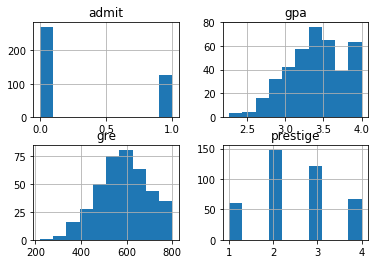

In [29]:
# plot the distribution of each variable 

admissions.hist() #The histogram function will do a basic distribution for each of our variables

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: It depends on the covariate.

- Admit: Because this is a binary variance (and the outcome), we wouldn't necessarily expect it to be normally distributed. 
- GPA: This isn't normally distributed - there aren't even "tails" on both the right & left ends of the distribution. In addition, there are a concentration of values in the "max" value (4.0), which doesn't match the tail that becomes much smaller with lower values (GPAs beleow ~2.5)
- GRE: This data is mostly normally distributed. There's mean/median are generally consistent, and the graph is mostly "bell shaped"
- Prestige: This is skewed slightly to the right. The mode and median are both 2, but the average is 2.48, so there is somewhat of a tail to the right with applicants in schools with prestige with higher scores (which confusingly, means they're lower tiered schools!)

In [30]:
admissions.describe() #Ran this again to validate my findings on distributions being skewed left/right

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: GPA is the covariate that would likely need the most correction. We could correct it using log regression. 

#### Question 11. Which of our variables are potentially colinear? 

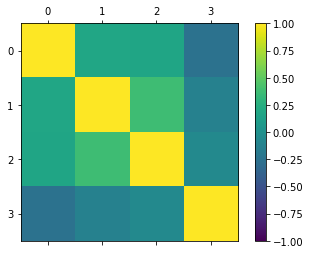

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


In [31]:
# create a correlation matrix for the data

correlation = admissions.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
plt.show()

correlation #print out the correlation results

#### Question 12. What did you find?

Answer: There doesn't appear to be any strong linear relationship between any of the covariates. The strongest linear relationship is between GRE & GPA (0.382408), but as this is fairly far away from 1, I believe that there is fairly low risk for colinearity.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 

1) Create my null & alternate hypotheses. 

2) I'd create a dummy variable for undergraduate prestige, so that we could individually evaluate each of the school prestige levels & see what impact they have on admission rates.

3) I'd then run a logistic regression between the 4 school rankings (1, 2, 3, 4) and admissions rates. I would also make sure I don't include other covariates, as this could influence coefficients when all we're interested in school prestige.

4) Analyze the regression output to see if I can reject the null hypothesis. 

#### Question 14. What is your hypothesis? 

Answer: 

- My null hypothesis is that there is no relationship between grad school admissions and prestige of undergraduate schools.
- The alternate hypothesis is that there is a relationship between grad school admissions and prestige of undergraduate schools.

I'd look to reject the null hypothesis by running a logistic regression.

In [32]:
#create a dummy variable for prestige

dummy_ranks = pd.get_dummies(admissions['prestige'], prefix='prestige')
print dummy_ranks.head()

   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0             0             0             1             0
1             0             0             1             0
2             1             0             0             0
3             0             0             0             1
4             0             0             0             1


In [33]:
# join the dummy variable back into the data set

admissions = admissions.join(dummy_ranks)

In [34]:
admissions.head() #print updated admissions data frame with prestige dummy variable

,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,3.0,0,0,1,0
1,1,660.0,3.67,3.0,0,0,1,0
2,1,800.0,4.00,1.0,1,0,0,0
3,1,640.0,3.19,4.0,0,0,0,1
4,0,520.0,2.93,4.0,0,0,0,1


In [35]:
# Now let's run a logistic regression
#training column
train_cols = admissions.columns[4:]
# Index([prestige_1, prestige_2, prestige_3, prestige_4], dtype=object)
# This will pull all columns from 4 over - so the 4 prestige variables

logit = sm.Logit(admissions['admit'], admissions[train_cols])

# fit the model
result = logit.fit()

#print the model summary
print result.summary()

Optimization terminated successfully.
         Current function value: 0.593375
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      393
Method:                           MLE   Df Model:                            3
Date:                Wed, 09 Aug 2017   Pseudo R-squ.:                 0.05042
Time:                        20:54:26   Log-Likelihood:                -235.57
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.533e-05
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
prestige_1.0     0.1643      0.257      0.639      0.523      -0.339       0.668
prestige_2.0    -0.5836

In [17]:
# Can we reject the null hypothesis?



## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

One alternate to dropping null records would be to populate null records with the median value instead. To do that - I'm going to create a 2nd version of the data frame to compare it to the data set I used above, to ensure there is actually a difference in outputs. 

In [37]:
admissions_alt = pd.read_csv("admissions.csv") #let's read in a new data frame
admissions_alt.describe() #let's also print a describe matrix so that we can confirm there's 400 records again

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [38]:
admissions_alt.count() #run counts. We can see again that we're missing 2 records from GRE/GA, and 1 from prestige

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [39]:
admissions_alt['gre'].fillna((admissions_alt['gre'].mean()), inplace=True)

In [40]:
admissions_alt.count() #GRE is now filled! Let'sdo the same for GPA

admit       400
gre         400
gpa         398
prestige    399
dtype: int64

In [41]:
admissions_alt['gpa'].fillna((admissions_alt['gpa'].mean()), inplace=True)

In [42]:
admissions_alt.count() #GPA is now filled! Let's round it out and do prestige

admit       400
gre         400
gpa         400
prestige    399
dtype: int64

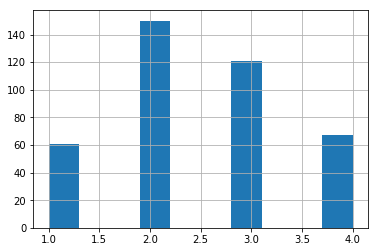

In [45]:
# Prestige is tough, because it's not conducive to median values. Let's fill the null instead with the most prominent value

admissions_alt['prestige'].hist() #This histogram shows us that 2 is the most prevalent school prestige level, so we'll fill the null value with that 

In [46]:
admissions_alt['prestige'].fillna('2.0', inplace=True)

In [47]:
admissions_alt.count() #Yay!!! All null values are filled

admit       400
gre         400
gpa         400
prestige    400
dtype: int64